In [1]:
import numpy as np
import  pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
original_image = cv2.imread("C:/Users/67563/Downloads/2.5 pj2/WeChat1 - Copy.jpg")

In [3]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
RGB_sum = np.sum(vectorized, axis=1)
# normalize R and G channel
vectorized[:,0] /= RGB_sum
vectorized[:,1] /= RGB_sum
vectorized[:,2] /= RGB_sum

In [4]:
RGB_sum.shape

(1653480,)

In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors =3
km = KMeans(n_clusters = dominant_colors)
km.fit(vectorized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
centers = centers * 255

In [8]:
centers = np.array(centers, dtype='uint8')
centers

array([[219,   8,  27],
       [ 49,  89, 116],
       [106,  82,  66]], dtype=uint8)

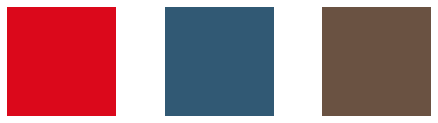

In [9]:
i = 1
plt.figure(0,figsize=(8,2))
colors = []
for each_col in centers:
    plt.subplot(1,3,i)
    i+=1
    plt.axis("off")
    colors.append(each_col)
    
    ##color Swatch(peice of color to just demonstrate how it looks like).
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [10]:
new_img = np.zeros(vectorized.shape,dtype='uint8')

print(new_img.shape)

(1653480, 3)


In [11]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

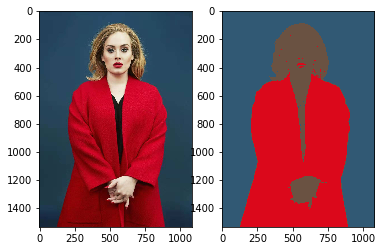

In [12]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((img.shape))
#new_img2=cv2.cvtColor(new_img,cv2.COLOR_BGR2XYZ)
#plt.imshow(new_img2)
#plt.show()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()